In [1]:
pip install handcalcs

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
import handcalcs.render

from pint import UnitRegistry
u=UnitRegistry(auto_reduce_dimensions=True)

import math

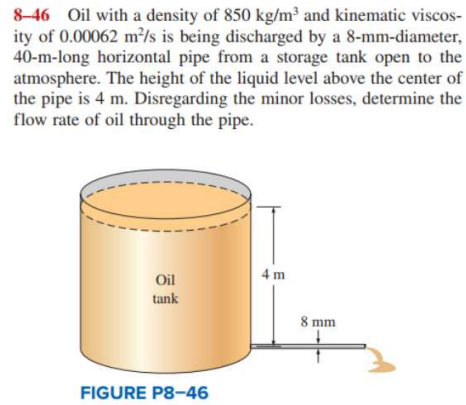

## Solution:
Fiven the oil and the horizontal pipe from a storage tank that opens to the atmosphere, the flow rate of the oil through the pipe is to be determined.

## Assumptions:
Disregarding the minor losses.
The flow is laminar.

In [12]:
%%render param
rho_oil = 850*u.kg/u.m**3 #density of oil
v_k = 0.00062*u.m**2/u.s #kinematic viscosity
D_p = 8*u.mm #diameter
L_p = 40*u.m #length of horizontal pipe
H_t = 4*u.m #height of liquid above center of pipe
g = 9.81*u.m/u.s**2 #gravity
pi = math.pi

<IPython.core.display.Latex object>

## Analysis:
Using the volume flow rate equation form the book:
"then the volume flow rate for laminar flow through a horizontal pipe of diameter D and length L becomes"
\begin{equation*}
\dot{V} = V_{avg}A_c = \dfrac{(P_1 - P_2)R^2}{8\mu L} = \dfrac{(P_1 - P_2)\pi D^4}{128\mu L} = \dfrac{\Delta P \pi D^4}{128 \mu L}
\end{equation*}

First find the pressure at the bottom of the tank

In [9]:
%%render
P_1gage = rho_oil*g*H_t

<IPython.core.display.Latex object>

Next, find the pressure drop across the pipe

In [10]:
%%render
deltaP = P_1gage

<IPython.core.display.Latex object>

Next find the dynamic viscosity

In [11]:
%%render
mu = rho_oil*v_k

<IPython.core.display.Latex object>

Plug those values into the volume flow rate equation

In [13]:
%%render
V_dot = (deltaP*pi*D_p**4)/(128*mu*L_p)

<IPython.core.display.Latex object>

In [18]:
print(V_dot.to('m**3/s'))

1.5906592997014642e-07 meter ** 3 / second


To validate this number, find the average fluid velocity: $V = \dfrac{\dot{V}}{A_c}$, and Reynolds number: $Re = \dfrac{\rho V D}{\mu}$

In [17]:
%%render
A_c = pi*D_p**2/4
V = V_dot/A_c
Re = rho_oil*V*D_p/mu

<IPython.core.display.Latex object>

## Discussion:
By using the volume flow rate equation, the variables needed to solve it were found and the volume flow rate was calculated to be $1.59x10^{-7} \dfrac{m^3}{s}$, which is a valid answer as the Reynolds number calculates is under 2300 and that means that the flow is laminar. 